# Absolute_EEG_%Evolution

### Importing libraries

In [1]:
import pandas as pd

from my_defs import (create_datasets, discriminate_target_association,
                     encoding_one_hot, normalize, predict, generate_samples, explore_dataset)

### Dataset exploration

In [2]:
data = pd.read_excel("EEG - Sortie Variables.xlsx", "Absolues %Evo")
data

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,25.0,0,0,0,3,1,Travaux_2,1,Manger,161,0,1,0,1,3.05014,1.6497,0.000000,0,5.454692,1,3.103440,1,0,1,1,0,1,1,0,1,1,0,3.401856,3.376158,-0.206644,-0.100385,0.283664,-0.268141,1.558302,0.103093,1.996370,7.794562,18.408275,14.951140,12.477970,14.849009,14.835787,14.945440,17.319848,14.625850,18.166238,23.885199,10.366859,6.490739,5.159705,5.512821,5.835933,5.505762,7.692308,4.906453,8.398197,17.471156,-4.153411,-3.223034,-2.414001,-4.933018,-4.064272,-5.644907,-5.581236,-5.602962,-5.552645,-2.410371,2.067797,1.415954,-3.982169,-3.006106,-3.882444,-2.004736,0.793383,-1.891673,1.540041,6.934172,10.015261,7.917297,8.043354,-0.116673
1,01DJ,25.0,0,0,0,5,4,Abs. Marquage,2,Lecture,351,1,1,2,0,2.65012,NaN,0.000000,0,4.167806,1,0.264597,0,0,0,1,0,1,0,0,1,0,1,-4.220484,-3.226770,-2.654586,-2.091350,-1.735358,-2.413273,-3.994268,-2.096220,-4.609800,-5.196375,10.196327,7.280130,9.270356,12.733218,11.929030,13.016368,12.494732,13.525410,12.210797,8.799810,3.606760,3.278151,5.107055,3.956044,4.899982,3.402232,3.060814,4.448263,2.621876,3.861549,-7.175680,-4.899012,-6.185878,-6.682427,-6.553245,-6.843267,-6.865263,-6.472388,-7.036843,-7.818513,-8.593220,-8.033086,-6.760773,-5.918271,-5.893271,-5.887924,-8.423363,-5.998383,-9.206023,-9.781805,1.983976,4.135149,3.023388,1.079134
2,01DJ,25.0,0,0,0,6,5,Météo,3,Conversation,224,0,0,0,0,8.00000,NaN,0.000000,0,2.861475,1,0.065688,0,0,0,1,0,1,0,0,1,0,1,0.836820,-1.673140,-1.303449,-0.836540,-0.533956,-1.089325,-0.698549,-1.632302,-0.435572,4.269889,15.410597,10.114007,12.160733,14.772072,13.967535,15.101325,15.044248,13.665466,15.531277,18.643264,7.687552,5.769546,5.545806,4.597070,6.019453,3.804646,4.269029,2.882780,4.608767,13.586061,-5.178508,-4.440625,-2.685576,-4.223798,-2.252678,-5.124566,-7.104948,-6.762196,-7.246377,-4.111809,-0.203390,-5.635777,-6.537890,-4.289964,-5.150812,-3.677979,-1.266036,-4.155214,-0.410678,4.955621,7.840519,7.261725,6.617228,0.604496
3,01DJ,25.0,0,0,0,1,1,Travaux_1,4,Jeu vidéo,128,0,0,1,1,2.00009,1.2935,0.000000,0,5.495789,1,3.184360,1,0,1,0,0,1,1,0,0,0,0,-81.808259,-1.329549,-0.365602,-0.217500,0.350409,-0.720630,-0.322407,-1.168385,-0.072595,3.081571,15.305045,9.902280,12.195982,15.445278,14.779162,15.685892,15.592078,14.365746,16.023993,17.718216,7.934872,5.146697,7.827308,5.641026,6.900349,4.920432,5.920258,5.135548,6.124539,11.937838,-5.372923,-5.185504,-5.114665,-5.311269,-4.127284,-6.244087,

In [3]:
explore_dataset(data)

DESCRIPTION


,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,ID NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,356.000000,357.000000,356.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,43.190476,0.733894,0.490196,0.476190,3.462185,2.658263,3.487395,411.921569,0.812325,0.336134,0.675070,0.616246,2.868189,16.953112,0.364146,9.131148,0.759104,2.103643,0.675070,0.075630,0.624650,0.789916,0.336134,0.717087,0.591036,0.288515,0.619048,0.487395,0.291317,-2.578811,-3.057213,-4.051414,-5.687340,-5.318053,266.494629,-4.178044,-4.592855,-4.047263,1.317271,4.566170,3.822598,4.485953,3.602238,3.561371,3.673297,3.683134,4.952761,3.411955,6.417715,-0.362999,-0.005301,-0.242441,-3.059121,-2.719311,-3.168586,-1.388276,-1.320230,-1.521888,2.417323,-6.621809,283.975294,-6.992153,-9.507241,-8.544022,-9.968053,-8.572518,-8.740082,-8.583349,-3.200990,-3.629429,-4.619109,-6.259960,-7.834248,-7.637227,-7.925618,-5.469278,-6.840846,-5.020258,1.206146,31.115127,2.871312,2.103437,1.122011
std,16.741806,0.827409,0.500605,0.500134,1.706514,1.489955,1.705241,322.424923,0.801028,0.473049,0.750109,0.486982,1.498398,29.055883,0.481865,10.551726,0.428228,1.391294,0.469006,0.264777,0.484893,0.407940,0.473049,0.451047,0.492333,0.453708,0.486302,0.500543,0.455007,16.448529,13.788980,14.528102,14.201131,14.187804,5156.243538,15.155829,14.701426,15.277602,19.938992,21.340900,18.091893,19.138466,19.972339,19.743898,20.478448,20.926908,21.596325,21.107532,25.615762,19.196836,17.229163,18.565617,16.923481,17.341447,16.854622,18.256254,18.077578,18.289204,24.646346,18.709996,5464.415794,17.488708,16.434595,16.876834,16.320300,17.957539,17.827552,18.316974,23.174747,22.084916,18.146991,19.546940,19.43295

****************************************************************************************************
INFORMATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 87 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Sujet                                                       357 non-null    object 
 1   Age                                                         357 non-null    float64
 2   Age category                                                357 non-null    int64  
 3   Gender                                                      357 non-null    int64  
 4   Scenario                                                    357 non-null    int64  
 5   ID scenario Event                                           357 non-null    int64  
 6   ID Event                                                    357 

None

****************************************************************************************************
PRESENCE OF NULL VALUE(S)?


Sujet                                                             0
Age                                                               0
Age category                                                      0
Gender                                                            0
Scenario                                                          0
ID scenario Event                                                 0
ID Event                                                          0
Event                                                             0
ID NDRT                                                           0
NDRT                                                              0
NDRT duration (s)                                                 0
NDRT duration                                                     0
NDRT solicitation hands                                           0
NDRT solicitation gaze                                            0
Lane changing                                   

****************************************************************************************************
PRESENCE OF DUPLICATED SAMPLE(S)?


0

****************************************************************************************************


### Data Processing (data cleaning and restructuring)

In [4]:
df = data.copy()

>**We can see that the variables that we can judge as categorical are not all in the 'object' format, which could cause us problems later.**
>
> **To start, we will convert the categorical variables to 'object'**

In [5]:
var_to_object = ['Gender',
                 'ID Event',
                 'ID NDRT',
                 'NDRT duration (s)',
                 'NDRT solicitation hands',
                 'NDRT solicitation gaze',
                 'Lane changing']

In [6]:
df[var_to_object]= df[var_to_object].astype('object')

> **We are going to normalize the continuous variables**

In [7]:
df_normalized = normalize(df, normalization_type='minmax')
df_normalized

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,0.028571,0.0,0,0.0,0.4,1,Travaux_2,1,Manger,161,0.0,1,0,1,0.282625,1.6497,0.000000,0.0,0.035965,1.0,0.626606,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.499361,0.372665,0.345839,0.379519,0.384554,0.000436,0.405289,0.385308,0.404423,0.328758,0.452341,0.435633,0.412396,0.495187,0.492415,0.497811,0.495096,0.497006,0.495537,0.421995,0.374814,0.332605,0.443855,0.398419,0.401227,0.397677,0.411576,0.407760,0.411824,0.360461,0.300746,0.000453,0.296828,0.327670,0.321908,0.330491,0.326514,0.437941,0.323746,0.276821,0.616780,0.455038,0.561985,0.613222,0.605206,0.620385,0.635813,0.628560,0.637288,0.633112,0.006999,0.337030,0.380409,0.503646
1,01DJ,0.028571,0.0,0,0.0,0.8,4,Abs. Marquage,2,Lecture,351,0.5,1,2,0,0.224651,NaN,0.000000,0.0,0.027208,1.0,0.046067,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.454692,0.312730,0.325490,0.361886,0.366722,0.000414,0.355550,0.366026,0.346220,0.248948,0.401231,0.386123,0.391356,0.479606,0.471981,0.483548,0.461952,0.489248,0.455105,0.344314,0.335541,0.313997,0.443599,0.387967,0.395124,0.383266,0.380918,0.404690,0.373805,0.295553,0.283535,0.000437,0.275271,0.316177,0.306100,0.322440,0.318325,0.433553,0.314432,0.250839,0.577443,0.406493,0.550326,0.600903,0.596502,0.604216,0.600586,0.611843,0.597030,0.580813,0.006194,0.317385,0.352715,0.525852
2,01DJ,0.028571,0.0,0,0.0,1.0,5,Météo,3,Conversation,224,0.0,0,0,0,1.000000,NaN,0.000000,0.0,0.018318,1.0,0.005390,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.484329,0.326832,0.336721,0.372999,0.377333,0.000427,0.385072,0.370093,0.382997,0.307104,0.433684,0.404413,0.410315,0.494621,0.486311,0.498964,0.479465,0.490235,0.477648,0.395002,0.359248,0.328427,0.445732,0.392270,0.402424,0.386023,0.388916,0.394199,0.386882,0.341932,0.294908,0.000442,0.295276,0.332330,0.333415,0.333987,0.316797,0.432090,0.313117,0.268647,0.608400,0.418809,0.551261,0.607791,0.599716,0.613418,0.627942,0.619346,0.629980,0.626922,0.006781,0.333625,0.372542,0.517038
3,01DJ,0.028571,0.0,0,0.0,0.0,1,Travaux_1,4,Jeu vidéo,128,0.0,0,1,1,0.130443,1.2935,0.000000,0.0,0.036245,1.0,0.643154,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.329951,0.344517,0.378482,0.385144,0.000431,0.388442,0.374160,0.386195,0.299804,0.433027,0.403047,0.410546,0.499578,0.492017,0.503286,0.483228,0.495172,0.480993,0.390239,0.360685,0.324820,0.456824,0.399280,0.408167,0.393667,0.399846,0.409295,0.396859,0.334071,0.293801,0.000434,0.281393,0.3

### Dataset creation

>**We will start by separating the features from the targets**

In [8]:
X_lane, y_lane, X_no_lane, y_no_lane, X_TOT, y_TOT = create_datasets(df_normalized, only_physio_datas=False)

### Reduction of dimensions according to the link of each figure with the targets.

**The objective here will be to measure the association of each feature with each target to exclude variables that have no impact with the targets.**

In [9]:
X_lane_reduced, lane_pvalues = discriminate_target_association(X_lane,y_lane)

In [10]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.029,0.174,0.063,0.03,0.023,0.393,0.269,0.972,0.958,0.993,0.746,0.83,0.475,0.897,0.724,0.92,0.596,0.561,0.999,0.715,0.454,0.411,0.483,0.697,0.59,0.734,0.97,0.682,0.473,0.302,0.797,0.895,0.757,0.752,0.904,0.707,0.535,0.786,0.535,0.792,0.834,0.997,0.649,0.708,0.724,0.671,0.658,0.116,0.385,0.175,0.19,0.176,0.206,0.127,0.206,0.108,0.08,0.541,0.828,0.89,0.846,0.029,0.174,0.063,0.03,0.023,0.393,0.269,0.972,0.958,0.993,0.746,0.83,0.475,0.897,0.724,0.92,0.596,0.561,0.999,0.715,0.454,0.411,0.483,0.697,0.59,0.734,0.97,0.682,0.473,0.302,0.797,0.895,0.757,0.752,0.904,0.707,0.535,0.786,0.535,0.792,0.834,0.997,0.649,0.708,0.724,0.671,0.658,0.116,0.385,0.175,0.19,0.176,0.206,0.127,0.206,0.108,0.08,0.541,0.828,0.89,0.846
TOQ (Coll a/o(TTC<1s & steering),0.009,0.782,0.036,0.604,0.001,0.884,0.824,0.204,0.047,0.932,0.05,0.637,0.032,0.731,0.064,0.05,0.144,0.044,0.005,0.004,0.003,0.002,0.011,0.007,0.009,0.007,0.036,0.026,0.038,0.015,0.014,0.009,0.019,0.043,0.042,0.049,0.015,0.872,0.5,0.691,0.556,0.694,0.506,0.76,0.689,0.737,0.443,0.186,0.109,0.179,0.23,0.228,0.228,0.239,0.304,0.222,0.163,0.344,0.002,0.002,0.358,0.009,0.782,0.036,0.604,0.001,0.884,0.824,0.204,0.047,0.932,0.05,0.637,0.032,0.731,0.064,0.05,0.144,0.044,0.005,0.004,0.003,0.002,0.011,0.007,0.009,0.007,0.

In [11]:
for key, value in X_lane_reduced.items():
    print(f"{key}: {value.shape}")

TOQ (Coll a/o(TTC<1s & braking): (220, 3)
TOQ (Coll a/o(TTC<1s & steering): (220, 29)
TOQ (Coll a/o(TTC<1s & mirror): (220, 2)


### TAKE-OVER WITH LANE CHANGING

In [12]:
X_lane_encoded = encoding_one_hot(X_lane_reduced)
list(X_lane_encoded.values())[0]

,Age,ID NDRT_1,ID NDRT_2,ID NDRT_3,ID NDRT_4,ID NDRT_5,ID NDRT_6,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872
0,0.028571,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.028571,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0.028571,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,0.028571,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6,0.028571,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.922449,0,1,0,0,0,0,0,0,0,0,0,1,0,0
349,0.922449,0,0,0,1,0,0,1,0,0,0,0,0,0,0
351,0.922449,0,0,0,0,0,1,0,1,0,0,0,0,0,0
352,0.922449,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o(TTC<1s & braking),0.029,0.174,0.063,0.03,0.023,0.393,0.269,0.972,0.958,0.993,0.746,0.83,0.475,0.897,0.724,0.92,0.596,0.561,0.999,0.715,0.454,0.411,0.483,0.697,0.59,0.734,0.97,0.682,0.473,0.302,0.797,0.895,0.757,0.752,0.904,0.707,0.535,0.786,0.535,0.792,0.834,0.997,0.649,0.708,0.724,0.671,0.658,0.116,0.385,0.175,0.19,0.176,0.206,0.127,0.206,0.108,0.08,0.541,0.828,0.89,0.846,0.029,0.174,0.063,0.03,0.023,0.393,0.269,0.972,0.958,0.993,0.746,0.83,0.475,0.897,0.724,0.92,0.596,0.561,0.999,0.715,0.454,0.411,0.483,0.697,0.59,0.734,0.97,0.682,0.473,0.302,0.797,0.895,0.757,0.752,0.904,0.707,0.535,0.786,0.535,0.792,0.834,0.997,0.649,0.708,0.724,0.671,0.658,0.116,0.385,0.175,0.19,0.176,0.206,0.127,0.206,0.108,0.08,0.541,0.828,0.89,0.846
TOQ (Coll a/o(TTC<1s & steering),0.009,0.782,0.036,0.604,0.001,0.884,0.824,0.204,0.047,0.932,0.05,0.637,0.032,0.731,0.064,0.05,0.144,0.044,0.005,0.004,0.003,0.002,0.011,0.007,0.009,0.007,0.036,0.026,0.038,0.015,0.014,0.009,0.019,0.043,0.042,0.049,0.015,0.872,0.5,0.691,0.556,0.694,0.506,0.76,0.689,0.737,0.443,0.186,0.109,0.179,0.23,0.228,0.228,0.239,0.304,0.222,0.163,0.344,0.002,0.002,0.358,0.009,0.782,0.036,0.604,0.001,0.884,0.824,0.204,0.047,0.932,0.05,0.637,0.032,0.731,0.064,0.05,0.144,0.044,0.005,0.004,0.003,0.002,0.011,0.007,0.009,0.007,0.

In [14]:
for key in y_lane:
    display(pd.DataFrame(lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o(TTC<1s & braking)
NDRT duration (s),0.023
NDRT duration (s),0.023
Age,0.029
Age,0.029
ID NDRT,0.03
ID NDRT,0.03
ID Event,0.063
ID Event,0.063
Oz GAMMA 30-50Hz,0.08
Oz GAMMA 30-50Hz,0.08


,TOQ (Coll a/o(TTC<1s & steering)
NDRT duration (s),0.001
NDRT duration (s),0.001
FRONTAL BETA,0.002
FRONTAL THETA,0.002
Fz ALPHA LOW 8-10Hz,0.002
Fz ALPHA LOW 8-10Hz,0.002
FRONTAL BETA,0.002
FRONTAL THETA,0.002
Fz ALPHA TOTAL 8-13Hz,0.003
Fz ALPHA TOTAL 8-13Hz,0.003


,TOQ (Coll a/o(TTC<1s & mirror)
NDRT duration (s),0.001
NDRT duration (s),0.001
Age,0.005
Age,0.005
ID Event,0.073
ID Event,0.073
Gender,0.124
Gender,0.124
ID NDRT,0.238
ID NDRT,0.238


TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,31,3
1.0,9,1


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        34
         1.0       0.25      0.10      0.14        10

    accuracy                           0.73        44
   macro avg       0.51      0.51      0.49        44
weighted avg       0.66      0.73      0.68        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,29,5
1.0,8,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82        34
         1.0       0.29      0.20      0.24        10

    accuracy                           0.70        44
   macro avg       0.53      0.53      0.53        44
weighted avg       0.67      0.70      0.68        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,27,7
1.0,8,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        34
         1.0       0.22      0.20      0.21        10

    accuracy                           0.66        44
   macro avg       0.50      0.50      0.50        44
weighted avg       0.65      0.66      0.65        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,32,2
1.0,10,0


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84        34
         1.0       0.00      0.00      0.00        10

    accuracy                           0.73        44
   macro avg       0.38      0.47      0.42        44
weighted avg       0.59      0.73      0.65        44

************************************



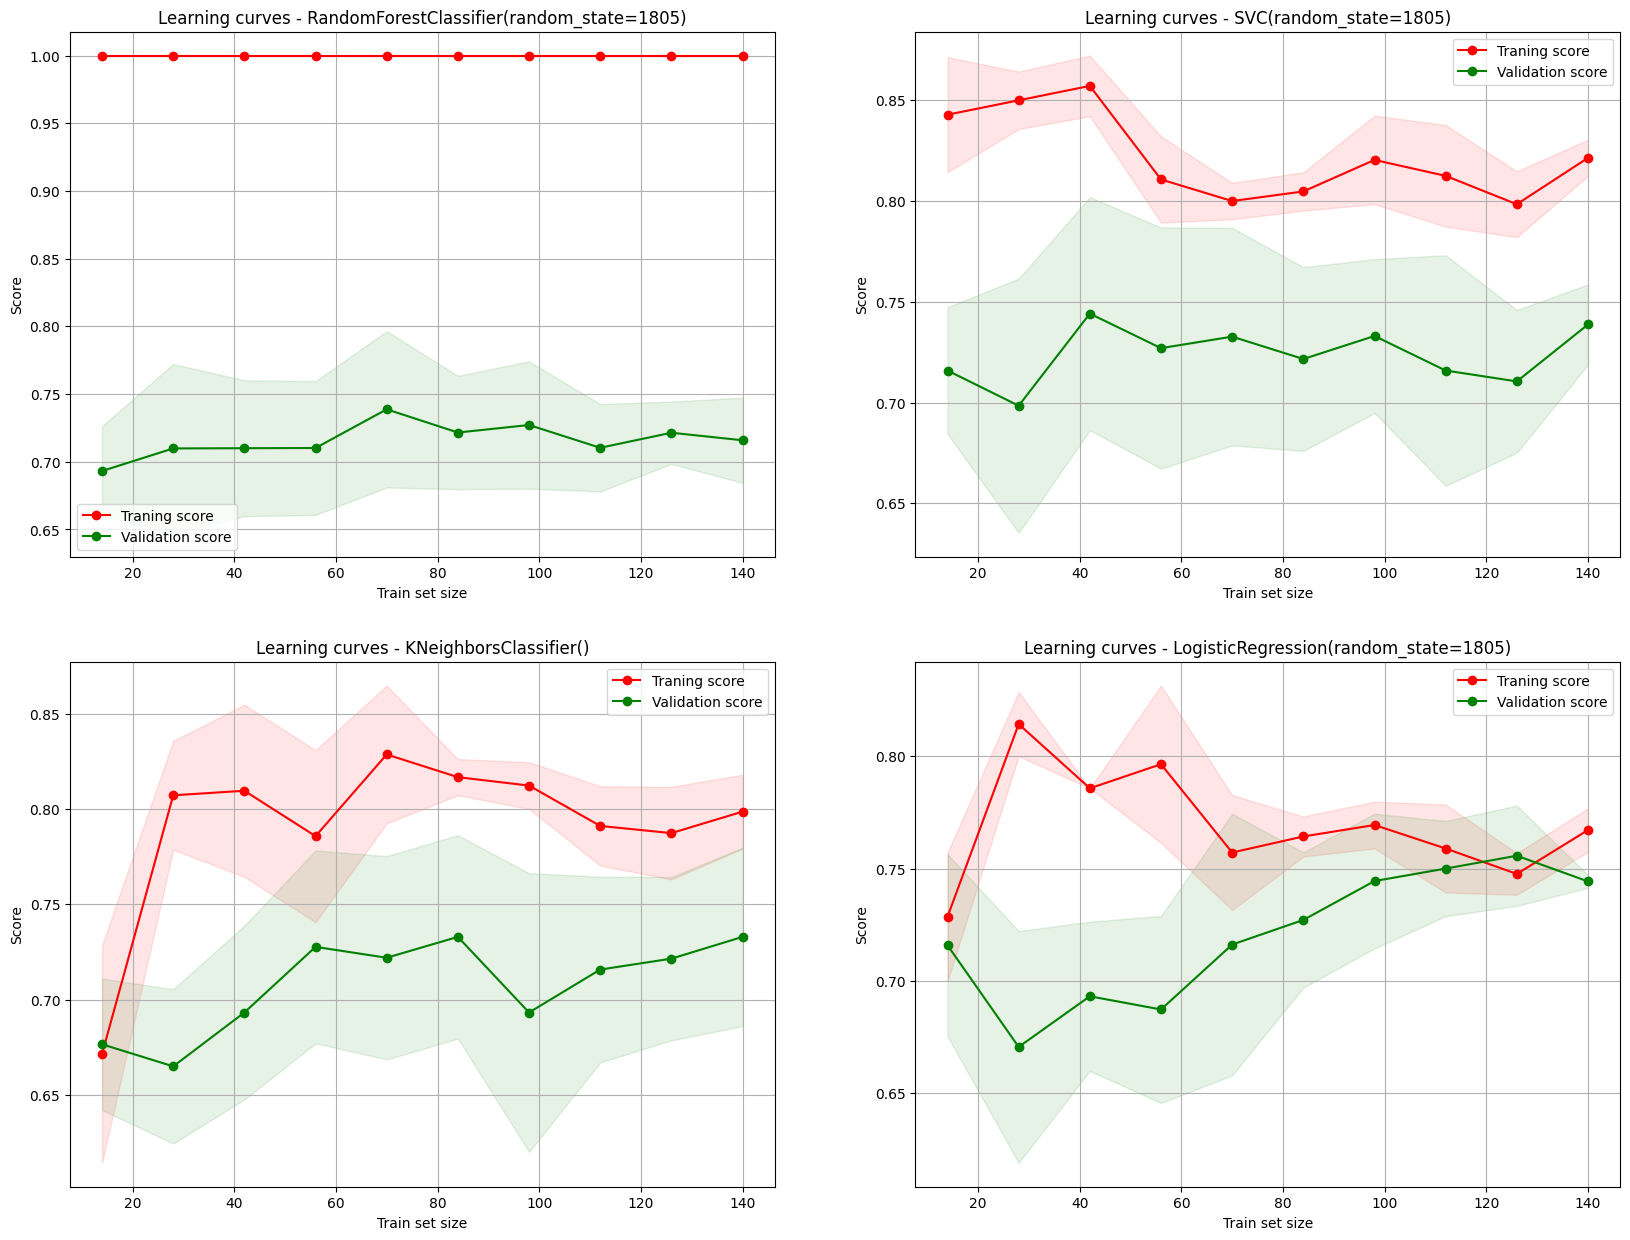

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.80,0.73,0.14,-0.20,Overfitting :0.09,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.84,0.70,0.24,-0.18,Overfitting :0.17,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.85,0.66,0.21,-0.24,Overfitting :0.22,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.76,0.73,0.00,-0.27,Overfitting :0.04,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,11
1.0,6,15


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.67      0.52      0.59        23
         1.0       0.58      0.71      0.64        21

    accuracy                           0.61        44
   macro avg       0.62      0.62      0.61        44
weighted avg       0.62      0.61      0.61        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,16,7
1.0,7,14


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        23
         1.0       0.67      0.67      0.67        21

    accuracy                           0.68        44
   macro avg       0.68      0.68      0.68        44
weighted avg       0.68      0.68      0.68        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,17,6
1.0,11,10


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.74      0.67        23
         1.0       0.62      0.48      0.54        21

    accuracy                           0.61        44
   macro avg       0.62      0.61      0.60        44
weighted avg       0.62      0.61      0.61        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,16,7
1.0,6,15


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.73      0.70      0.71        23
         1.0       0.68      0.71      0.70        21

    accuracy                           0.70        44
   macro avg       0.70      0.70      0.70        44
weighted avg       0.71      0.70      0.70        44

************************************



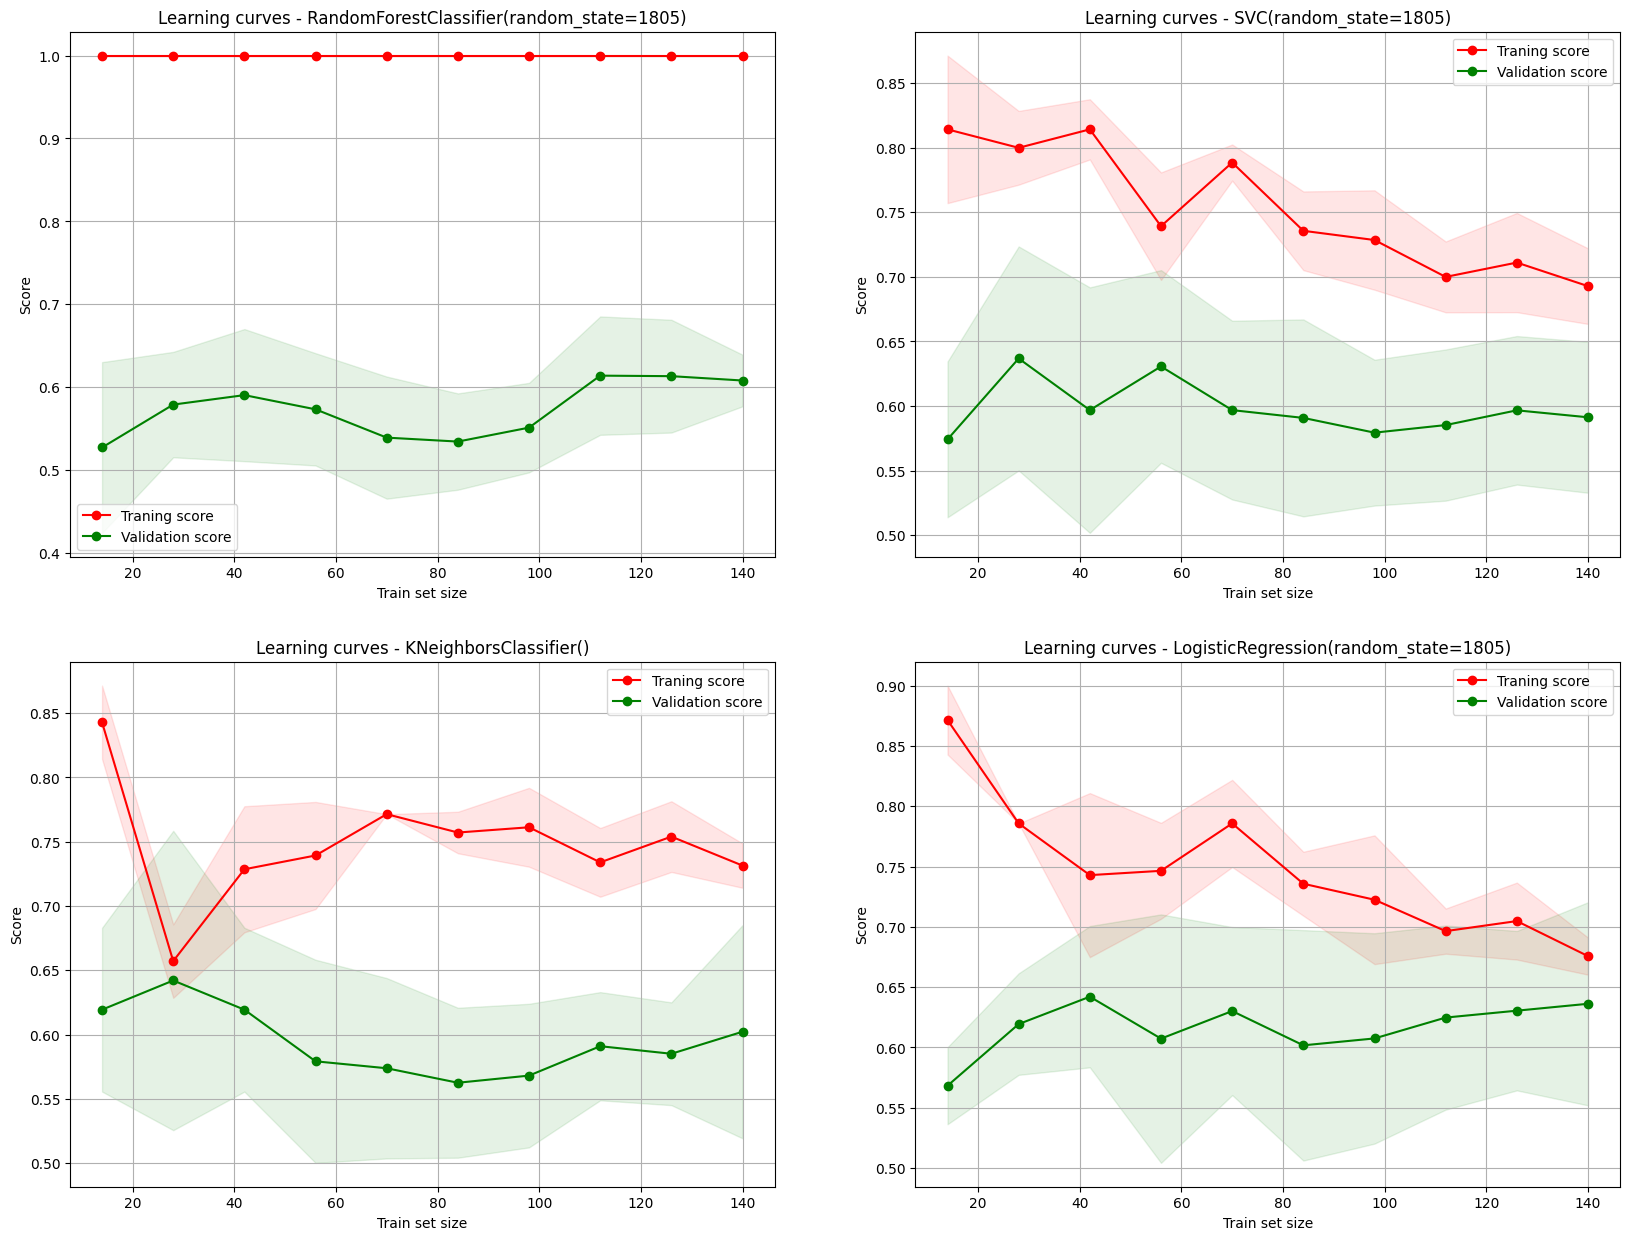

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",0.89,0.61,0.64,-0.12,Overfitting :0.31,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.68,0.68,0.67,0.03,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.68,0.61,0.54,-0.13,Overfitting :0.1,too much complex
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.69,0.70,0.70,0.09,Underfitting :-0.01,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,13
1.0,3,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.48      0.60        25
         1.0       0.55      0.84      0.67        19

    accuracy                           0.64        44
   macro avg       0.68      0.66      0.63        44
weighted avg       0.69      0.64      0.63        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,17
1.0,1,18


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.32      0.47        25
         1.0       0.51      0.95      0.67        19

    accuracy                           0.59        44
   macro avg       0.70      0.63      0.57        44
weighted avg       0.73      0.59      0.56        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,13
1.0,4,15


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.48      0.59        25
         1.0       0.54      0.79      0.64        19

    accuracy                           0.61        44
   macro avg       0.64      0.63      0.61        44
weighted avg       0.66      0.61      0.61        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,9,16
1.0,2,17


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50        25
         1.0       0.52      0.89      0.65        19

    accuracy                           0.59        44
   macro avg       0.67      0.63      0.58        44
weighted avg       0.69      0.59      0.57        44

************************************



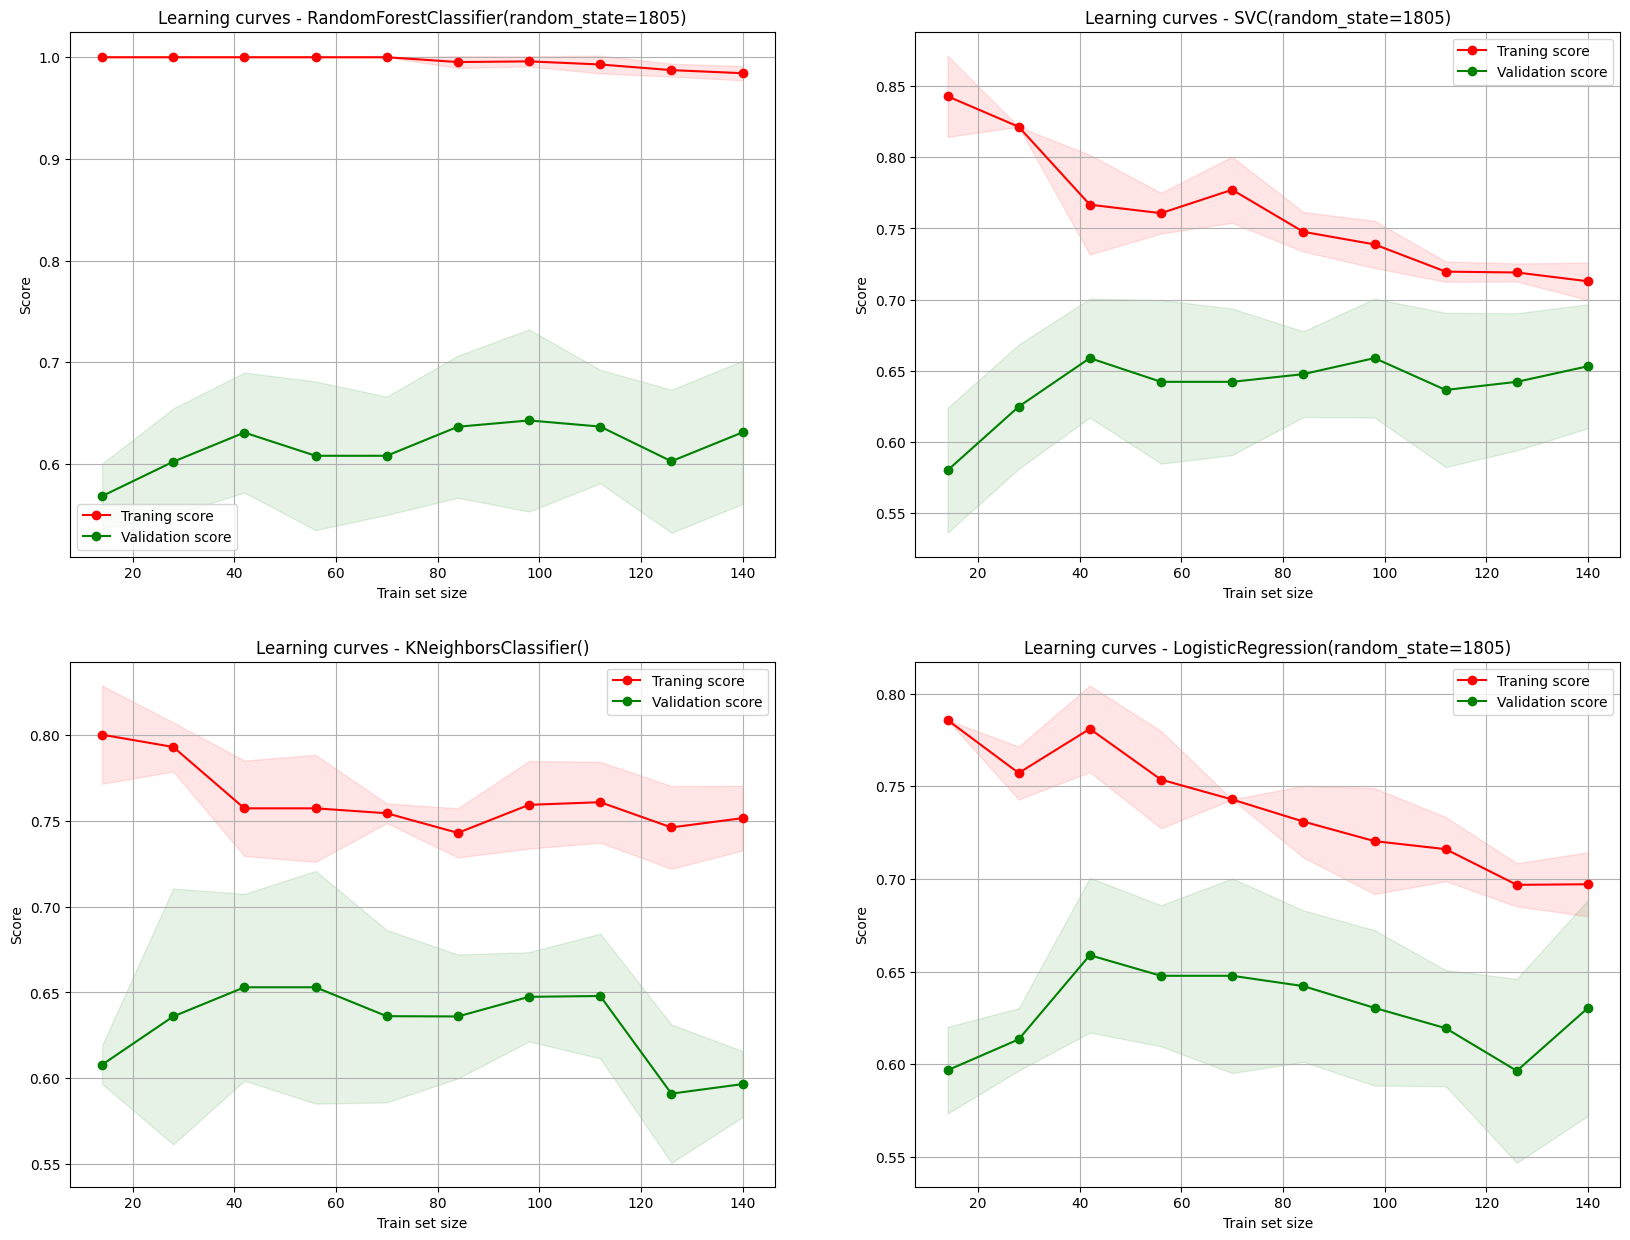

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.84,0.64,0.67,-0.07,Overfitting :0.24,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.67,0.59,0.67,-0.19,Overfitting :0.12,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.69,0.61,0.64,-0.12,Overfitting :0.12,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.68,0.59,0.65,-0.18,Overfitting :0.13,too much complex


In [15]:
predict(X_lane_encoded,y_lane, method = 'classification')

### Resampling dataset (create new samples)

In [16]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_encoded,y_lane,n_samples_created=500)

In [17]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_resampled,y_lane_resampled, _sampling_strategy='auto')

TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,66,20
1.0,10,104


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.81        86
         1.0       0.84      0.91      0.87       114

    accuracy                           0.85       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.85      0.85       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,67,19
1.0,9,105


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83        86
         1.0       0.85      0.92      0.88       114

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,67,19
1.0,11,103


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        86
         1.0       0.84      0.90      0.87       114

    accuracy                           0.85       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.85      0.85       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,68,18
1.0,27,87


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75        86
         1.0       0.83      0.76      0.79       114

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200

************************************



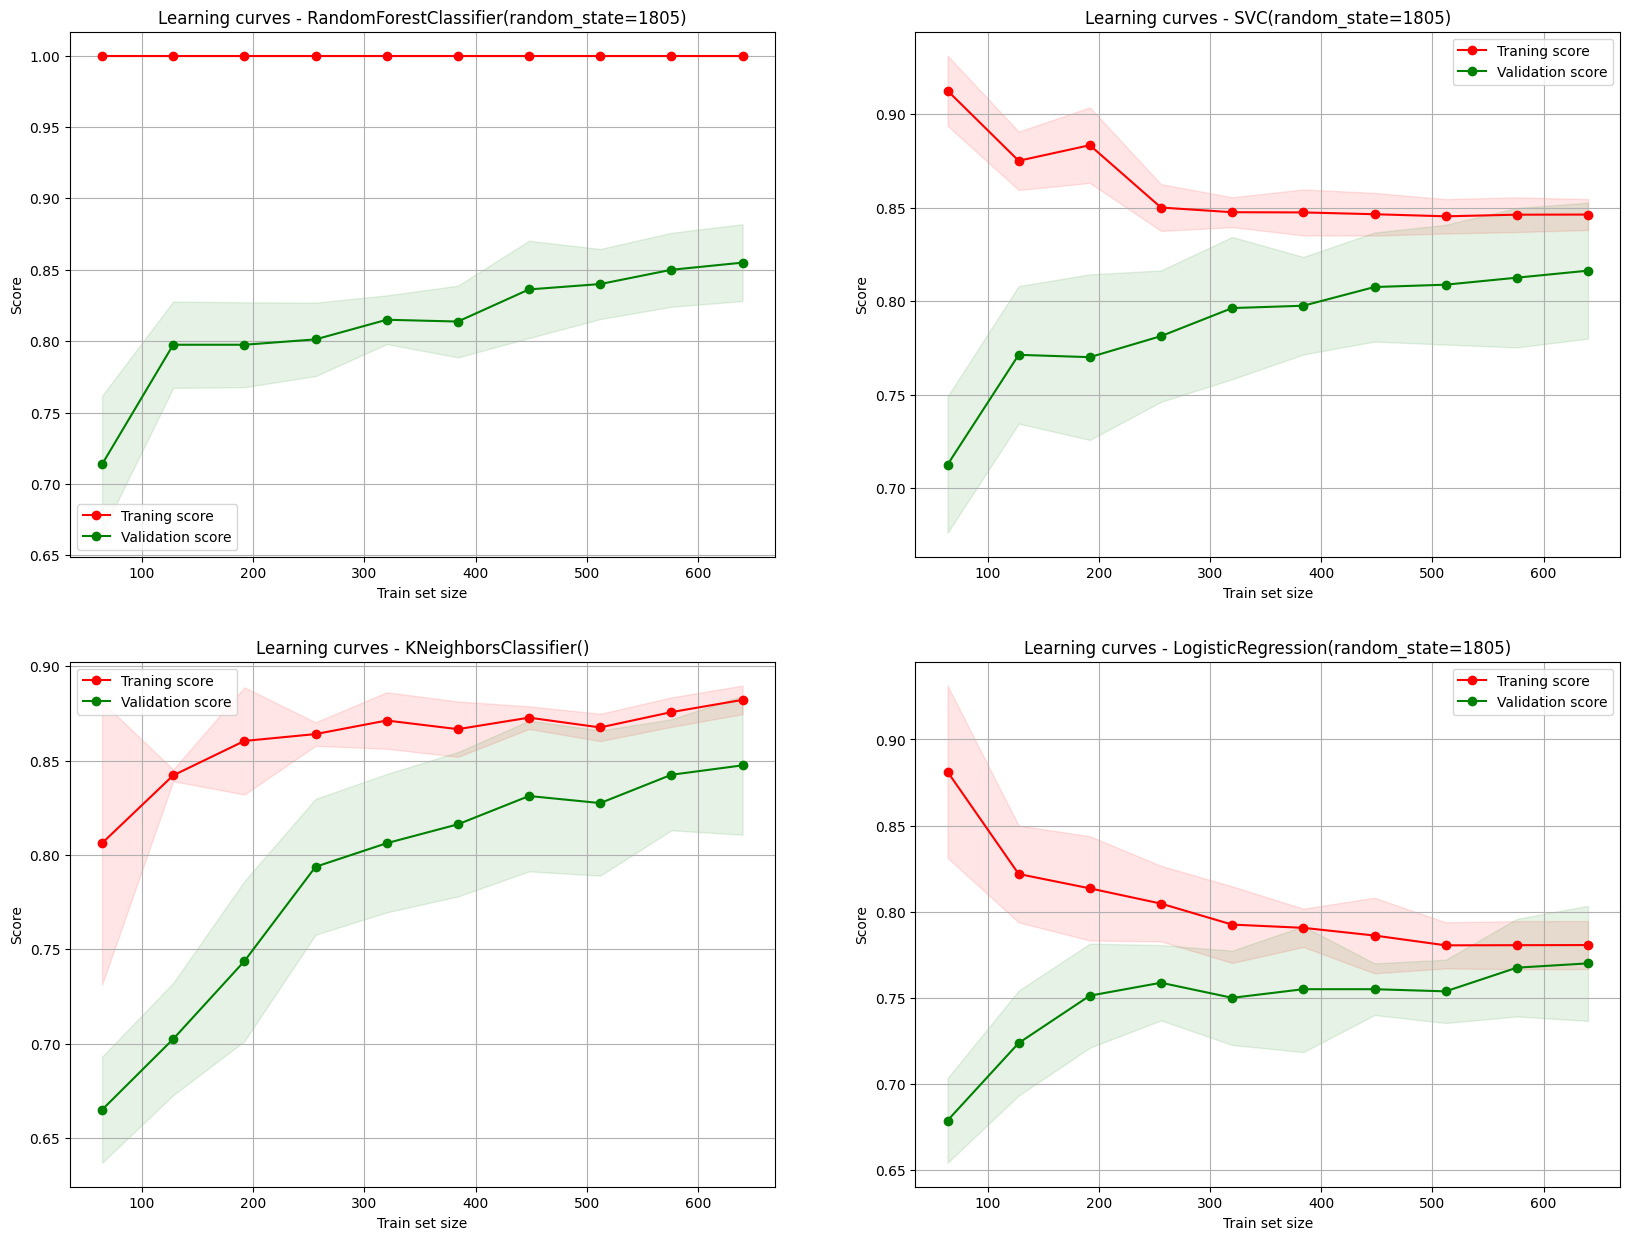

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.95,0.85,0.87,0.46,Overfitting :0.11,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.92,0.86,0.88,0.49,Overfitting :0.07,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'distan...",1.00,0.85,0.87,0.47,Overfitting :0.15,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.79,0.78,0.79,0.26,Overfitting :0.01,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,75,11
1.0,15,99


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        86
         1.0       0.90      0.87      0.88       114

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,82,4
1.0,1,113


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        86
         1.0       0.97      0.99      0.98       114

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,80,6
1.0,8,106


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        86
         1.0       0.95      0.93      0.94       114

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,63,23
1.0,30,84


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70        86
         1.0       0.79      0.74      0.76       114

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.74       200

************************************



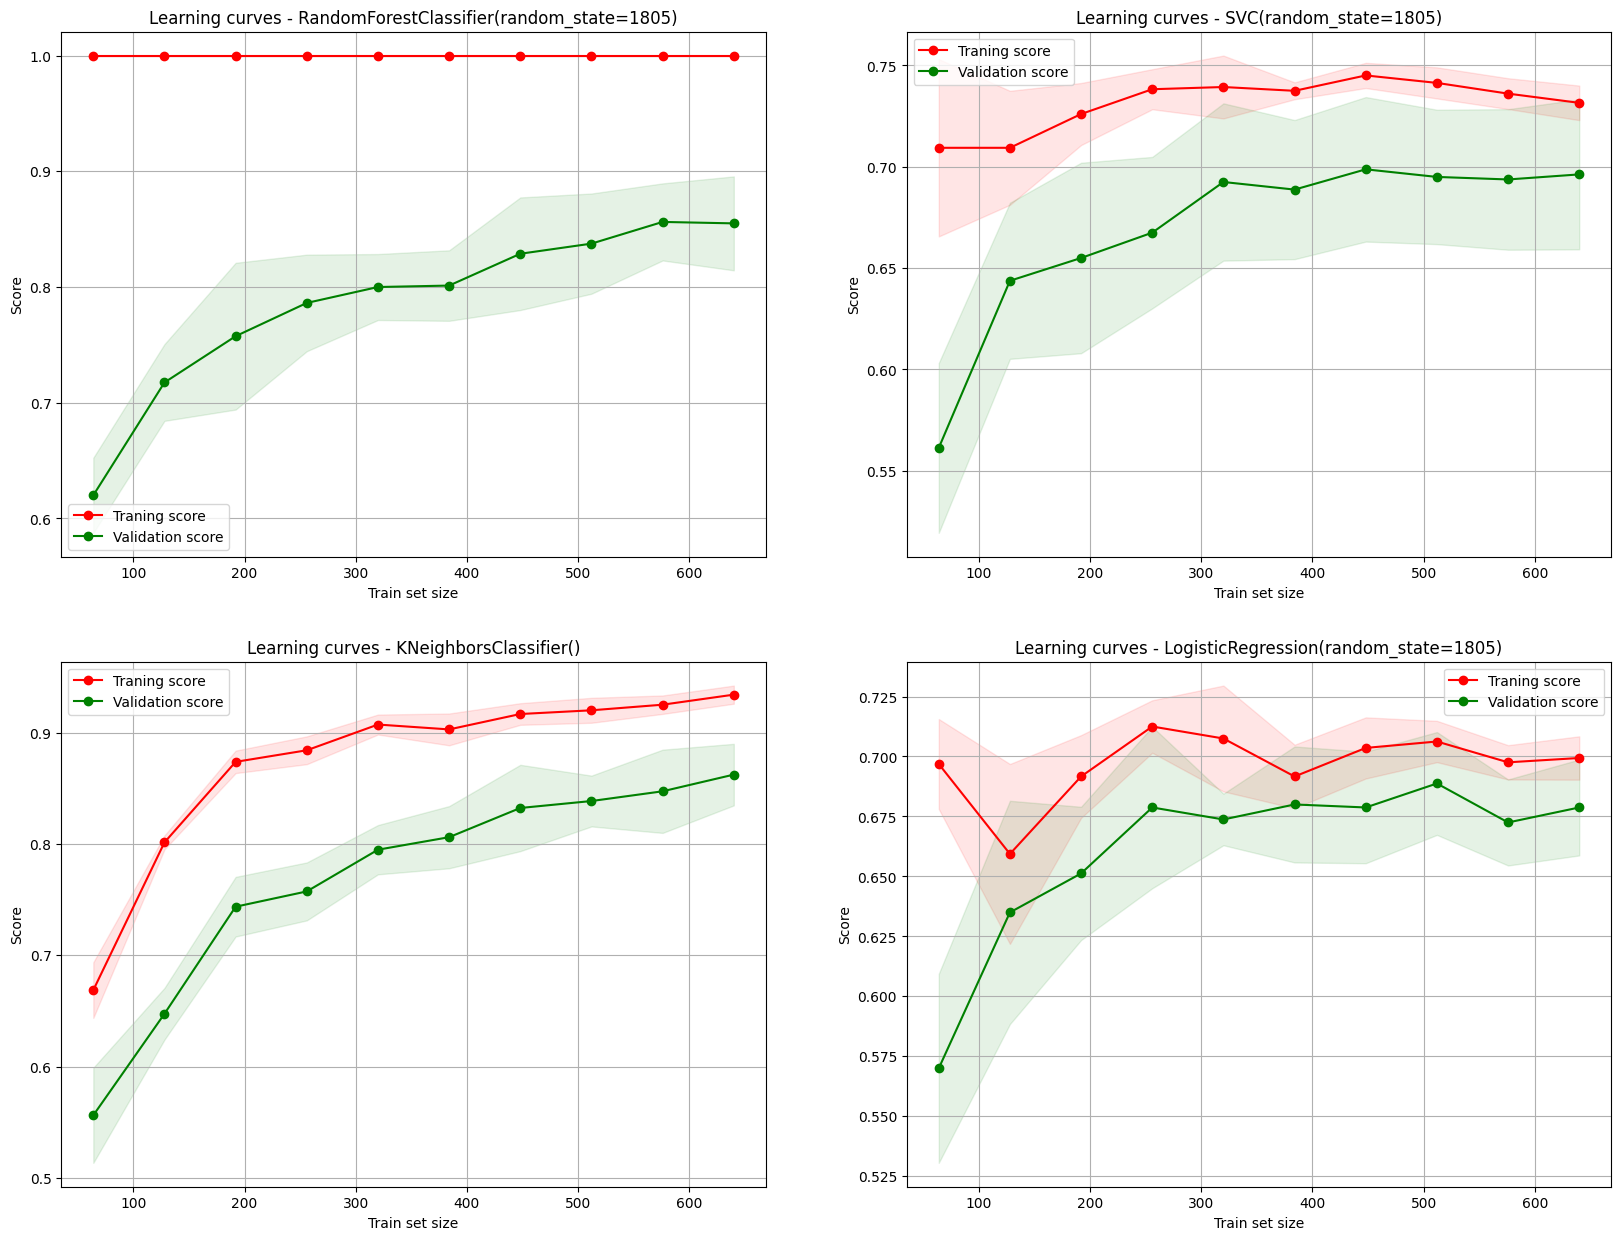

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': None, 'max_features': 'log2', 'n...",1.00,0.87,0.88,0.53,Overfitting :0.13,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}",1.00,0.98,0.98,0.90,Overfitting :0.02,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.00,0.93,0.94,0.73,Overfitting :0.07,too much complex
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.72,0.74,0.76,0.16,Underfitting :-0.03,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,67,18
1.0,44,71


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.79      0.68        85
         1.0       0.80      0.62      0.70       115

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.72      0.69      0.69       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,58,27
1.0,35,80


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65        85
         1.0       0.75      0.70      0.72       115

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,68,17
1.0,46,69


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.80      0.68        85
         1.0       0.80      0.60      0.69       115

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.68       200
weighted avg       0.71      0.69      0.69       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,60,25
1.0,45,70


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.57      0.71      0.63        85
         1.0       0.74      0.61      0.67       115

    accuracy                           0.65       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.67      0.65      0.65       200

************************************



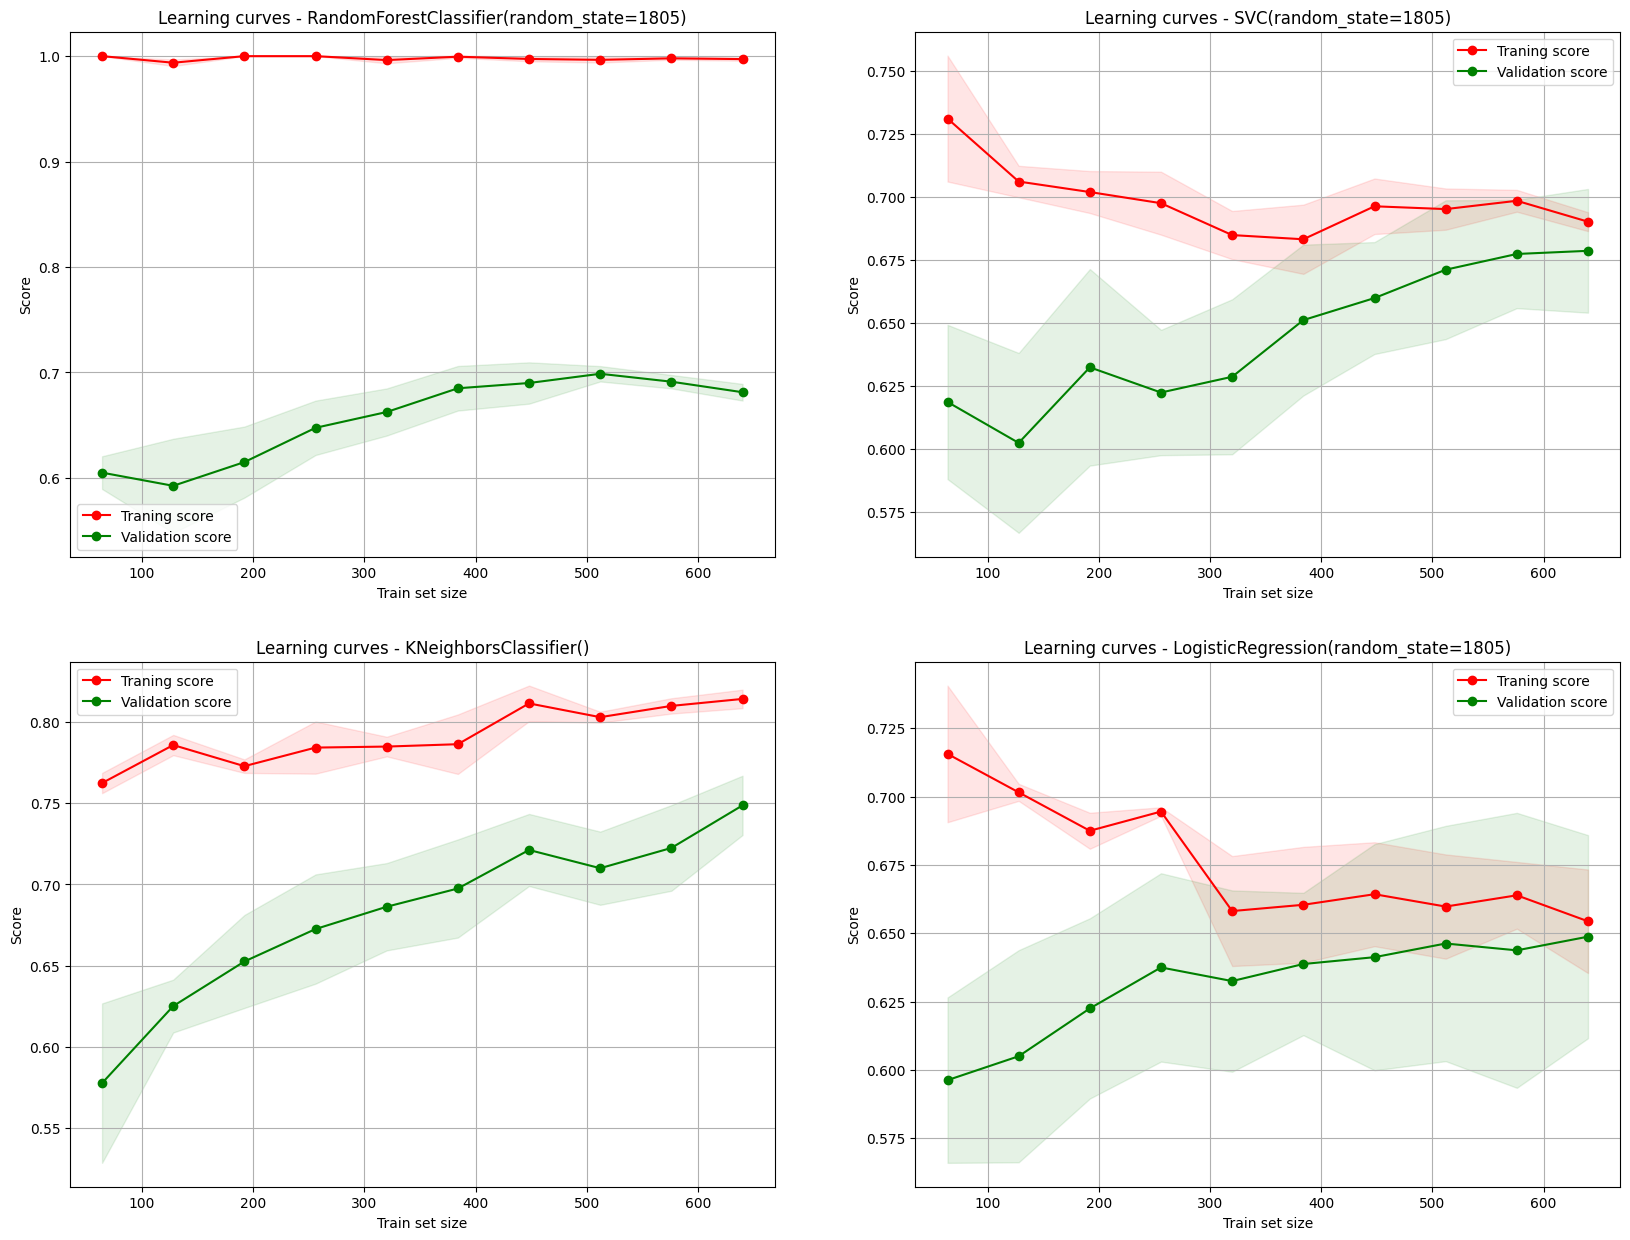

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.90,0.69,0.70,0.05,Overfitting :0.23,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.74,0.69,0.72,0.05,Overfitting :0.07,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.82,0.68,0.69,0.04,Overfitting :0.17,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.65,0.65,0.67,-0.04,Overfitting :0.0,not complexe enough


In [18]:
predict(X_lane_resampled,y_lane_resampled, method = 'classification')

### TAKE-OVER WITHOUT CHANGING LANE

In [19]:
X_no_lane_reduced, no_lane_pvalues = discriminate_target_association(X_no_lane,y_no_lane)

In [20]:
no_lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOQ (Coll a/o ILC),0.015,0.275,0.0,0.149,0.0,0.205,0.023,0.809,0.616,0.54,0.601,0.575,0.147,0.638,0.438,0.352,0.971,0.121,0.089,0.11,0.079,0.087,0.074,0.035,0.019,0.006,0.121,0.319,0.303,0.265,0.347,0.252,0.4,0.166,0.139,0.213,0.455,0.771,0.147,0.457,0.749,0.691,0.712,0.548,0.727,0.591,1.0,0.782,0.938,0.704,0.866,0.966,0.815,0.945,0.953,0.92,0.822,0.115,0.12,0.074,0.334,0.015,0.275,0.0,0.149,0.0,0.205,0.023,0.809,0.616,0.54,0.601,0.575,0.147,0.638,0.438,0.352,0.971,0.121,0.089,0.11,0.079,0.087,0.074,0.035,0.019,0.006,0.121,0.319,0.303,0.265,0.347,0.252,0.4,0.166,0.139,0.213,0.455,0.771,0.147,0.457,0.749,0.691,0.712,0.548,0.727,0.591,1.0,0.782,0.938,0.704,0.866,0.966,0.815,0.945,0.953,0.92,0.822,0.115,0.12,0.074,0.334


In [21]:
for key in y_no_lane:
    display(pd.DataFrame(no_lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o ILC)
ID Event,0.0
NDRT duration (s),0.0
NDRT duration (s),0.0
ID Event,0.0
Fz BETA HIGH 17-30Hz,0.006
Fz BETA HIGH 17-30Hz,0.006
Age,0.015
Age,0.015
Fz BETA LOW 13-17Hz,0.019
Fz BETA LOW 13-17Hz,0.019


In [22]:
X_no_lane_encoded = encoding_one_hot(X_no_lane_reduced)
list(X_no_lane_encoded.values())[0]

,Age,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,ID Event_1,ID Event_2,ID Event_3,ID Event_4,ID Event_5,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265,NDRT solicitation gaze_0,NDRT solicitation gaze_1,NDRT solicitation gaze_2
1,0.028571,0.461952,0.489248,0.455105,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0.028571,0.479465,0.490235,0.477648,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
8,0.028571,0.535621,0.549339,0.532479,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
9,0.028571,0.546041,0.565420,0.541060,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
15,0.171429,0.555702,0.596559,0.545750,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
16,0.171429,0.548610,0.577551,0.541424,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
17,0.171429,0.532147,0.495842,0.544732,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
18,0.171429,0.561781,0.532624,0.571960,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
24,0.016327,0.440382,0.484805,0.429075,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
25,0.016327,0.457855,0.477501,0.448403,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [23]:
for k in X_no_lane_encoded:
    X_no_lane_encoded[k] = X_no_lane_encoded[k].astype(int)

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,5,4
1.0,2,17


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63         9
         1.0       0.81      0.89      0.85        19

    accuracy                           0.79        28
   macro avg       0.76      0.73      0.74        28
weighted avg       0.78      0.79      0.78        28

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************



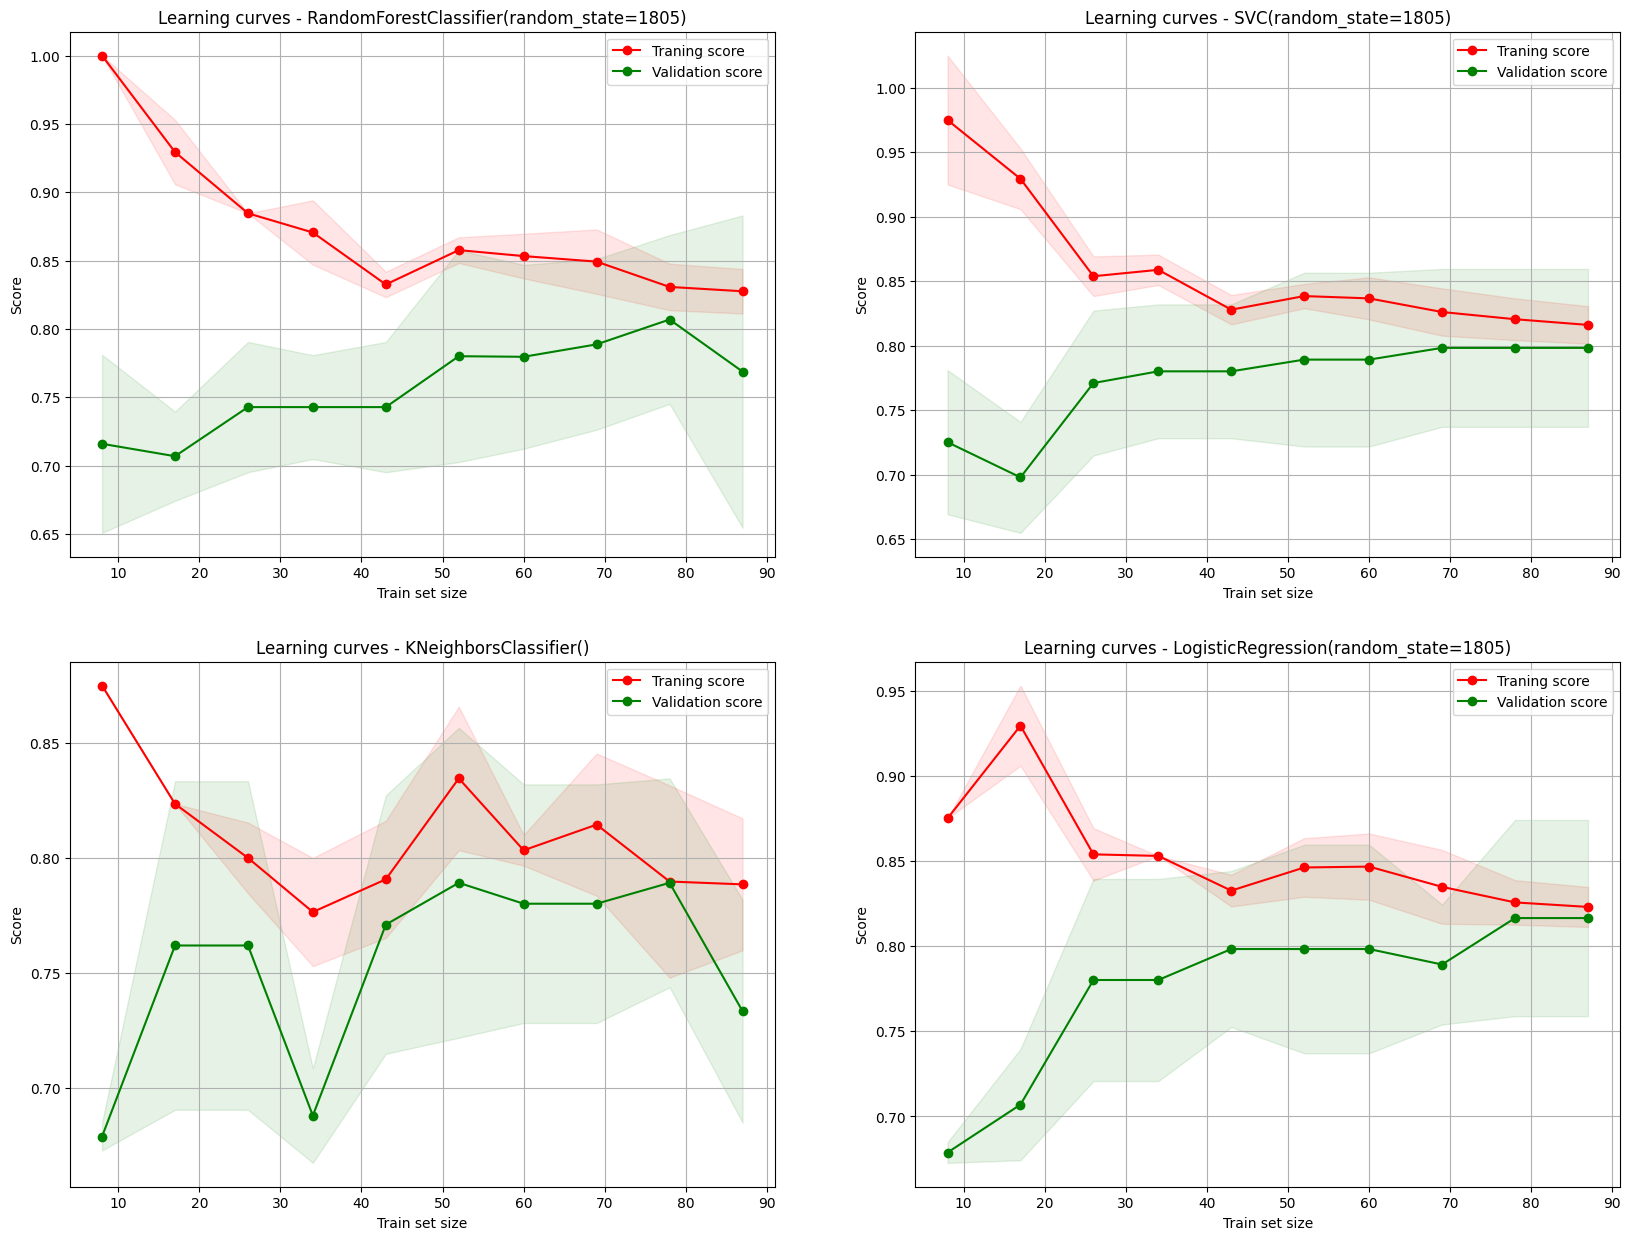

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.83,0.82,0.88,0.24,Overfitting :0.01,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.82,0.82,0.88,0.24,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.81,0.79,0.85,0.19,Overfitting :0.02,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.82,0.82,0.88,0.24,Overfitting :0.0,not complexe enough


In [24]:
predict(X_no_lane_encoded,y_no_lane, method = 'classification')

### Resampling dataset (create new samples)

In [25]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_encoded,y_no_lane,n_samples_created=200)

In [26]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_resampled,y_no_lane_resampled, _sampling_strategy='auto')

In [27]:
X_no_lane_resampled

{'TOQ (Coll a/o  ILC)':      Age  Fz BETA TOTAL 13-30Hz  Fz BETA LOW 13-17Hz  Fz BETA HIGH 17-30Hz  \
 0      0                      0                    0                     0   
 1      0                      0                    0                     0   
 2      0                      0                    0                     0   
 3      0                      0                    0                     0   
 4      0                      0                    0                     0   
 ..   ...                    ...                  ...                   ...   
 395    0                      0                    0                     0   
 396    0                      0                    0                     0   
 397    0                      0                    0                     0   
 398    0                      0                    0                     0   
 399    0                      0                    0                     0   
 
      ID Event_1  ID Event_

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,30,3
1.0,10,37


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        33
         1.0       0.93      0.79      0.85        47

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,30,3
1.0,10,37


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        33
         1.0       0.93      0.79      0.85        47

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,31,2
1.0,13,34


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.94      0.81        33
         1.0       0.94      0.72      0.82        47

    accuracy                           0.81        80
   macro avg       0.82      0.83      0.81        80
weighted avg       0.85      0.81      0.81        80

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,25,8
1.0,7,40


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        33
         1.0       0.83      0.85      0.84        47

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.81        80
weighted avg       0.81      0.81      0.81        80

************************************



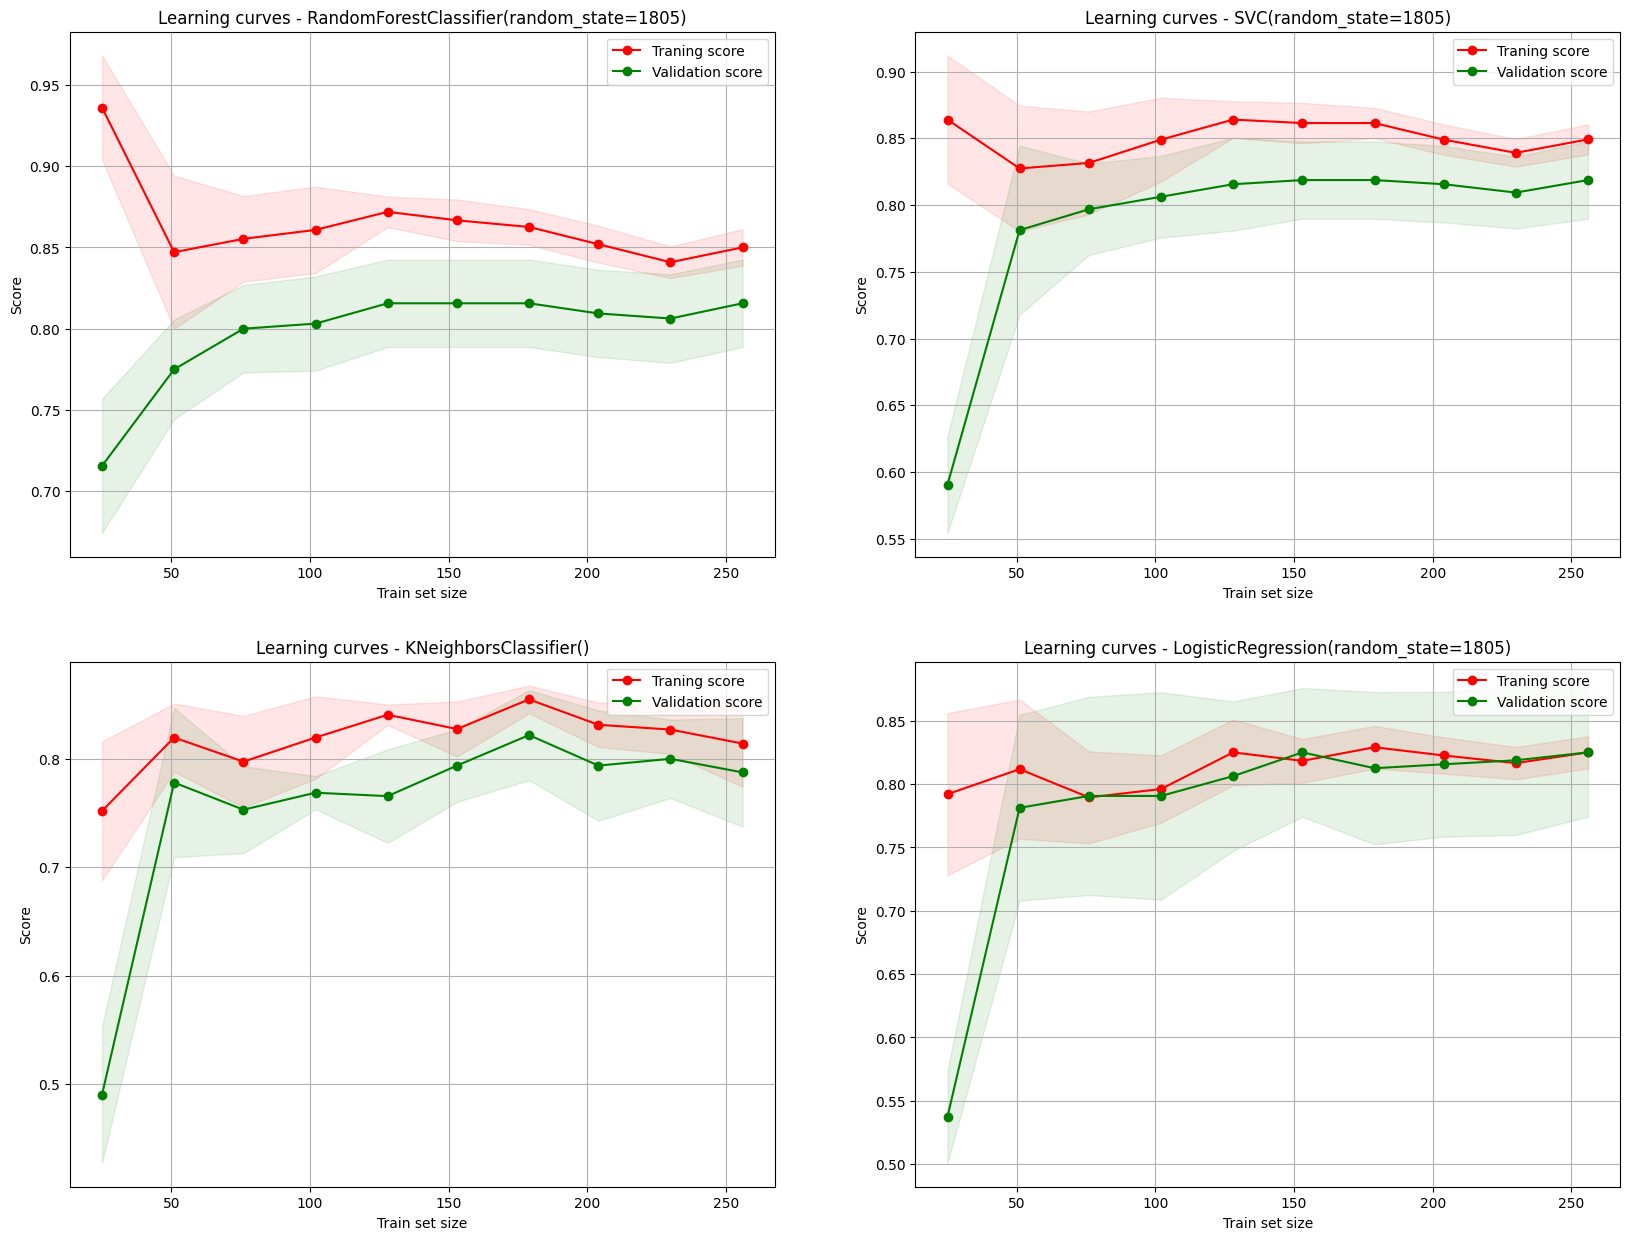

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.85,0.84,0.85,0.44,Overfitting :0.01,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.85,0.84,0.85,0.44,Overfitting :0.01,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.84,0.81,0.82,0.37,Overfitting :0.04,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.82,0.81,0.84,0.35,Overfitting :0.01,not complexe enough


In [28]:
predict(X_no_lane_resampled,y_no_lane_resampled, method = 'classification')

### TAKE-OVER TIME

In [29]:
X_TOT_reduced, TOT_pvalues = discriminate_target_association(X_TOT,y_TOT)

In [30]:
X_TOT_encoded = encoding_one_hot(X_TOT_reduced)
list(X_TOT_encoded.values())[0]

,Pz TOTAL BAND 1-50Hz,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.300746,0,1,0,0,0,0,0,0,0,0,0,0
1,0.283535,0,0,0,0,0,0,0,1,0,0,0,0
2,0.294908,0,0,0,1,0,0,0,0,0,0,0,0
3,0.293801,1,0,0,0,0,0,0,0,0,0,0,0
4,0.287762,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.035174,0,0,1,0,0,0,0,0,0,0,0,0
353,0.002203,0,0,0,0,1,0,0,0,0,0,0,0
354,0.025462,0,0,0,0,0,0,0,0,0,0,0,1
355,0.024728,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
list(X_TOT_reduced.values())[0]

,Pz TOTAL BAND 1-50Hz,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.300746,0,1,0,0,0,0,0,0,0,0,0,0
1,0.283535,0,0,0,0,0,0,0,1,0,0,0,0
2,0.294908,0,0,0,1,0,0,0,0,0,0,0,0
3,0.293801,1,0,0,0,0,0,0,0,0,0,0,0
4,0.287762,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.035174,0,0,1,0,0,0,0,0,0,0,0,0
353,0.002203,0,0,0,0,1,0,0,0,0,0,0,0
354,0.025462,0,0,0,0,0,0,0,0,0,0,0,1
355,0.024728,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
TOT_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOT (s),0.121,0.709,0.053,0.259,0.033,0.086,0.286,0.799,0.67,0.835,0.974,0.973,0.972,0.808,0.965,0.983,0.655,0.26,0.196,0.124,0.336,0.273,0.388,0.385,0.345,0.405,0.368,0.56,0.67,0.246,0.44,0.716,0.282,0.759,0.64,0.813,0.604,0.04,0.222,0.269,0.22,0.22,0.207,0.085,0.49,0.064,0.234,0.72,0.768,0.731,0.75,0.752,0.751,0.715,0.765,0.699,0.599,0.277,0.227,0.392,0.493,0.121,0.709,0.053,0.259,0.033,0.086,0.286,0.799,0.67,0.835,0.974,0.973,0.972,0.808,0.965,0.983,0.655,0.26,0.196,0.124,0.336,0.273,0.388,0.385,0.345,0.405,0.368,0.56,0.67,0.246,0.44,0.716,0.282,0.759,0.64,0.813,0.604,0.04,0.222,0.269,0.22,0.22,0.207,0.085,0.49,0.064,0.234,0.72,0.768,0.731,0.75,0.752,0.751,0.715,0.765,0.699,0.599,0.277,0.227,0.392,0.493


In [33]:
for key in y_TOT:
    display(pd.DataFrame(TOT_pvalues.T[key].sort_values()[:10]))

,TOT (s)
NDRT duration (s),0.033
NDRT duration (s),0.033
Pz TOTAL BAND 1-50Hz,0.04
Pz TOTAL BAND 1-50Hz,0.04
ID Event,0.053
ID Event,0.053
Pz BETA HIGH 17-30Hz,0.064
Pz BETA HIGH 17-30Hz,0.064
Pz BETA TOTAL 13-30Hz,0.085
Pz BETA TOTAL 13-30Hz,0.085


TOT (s)



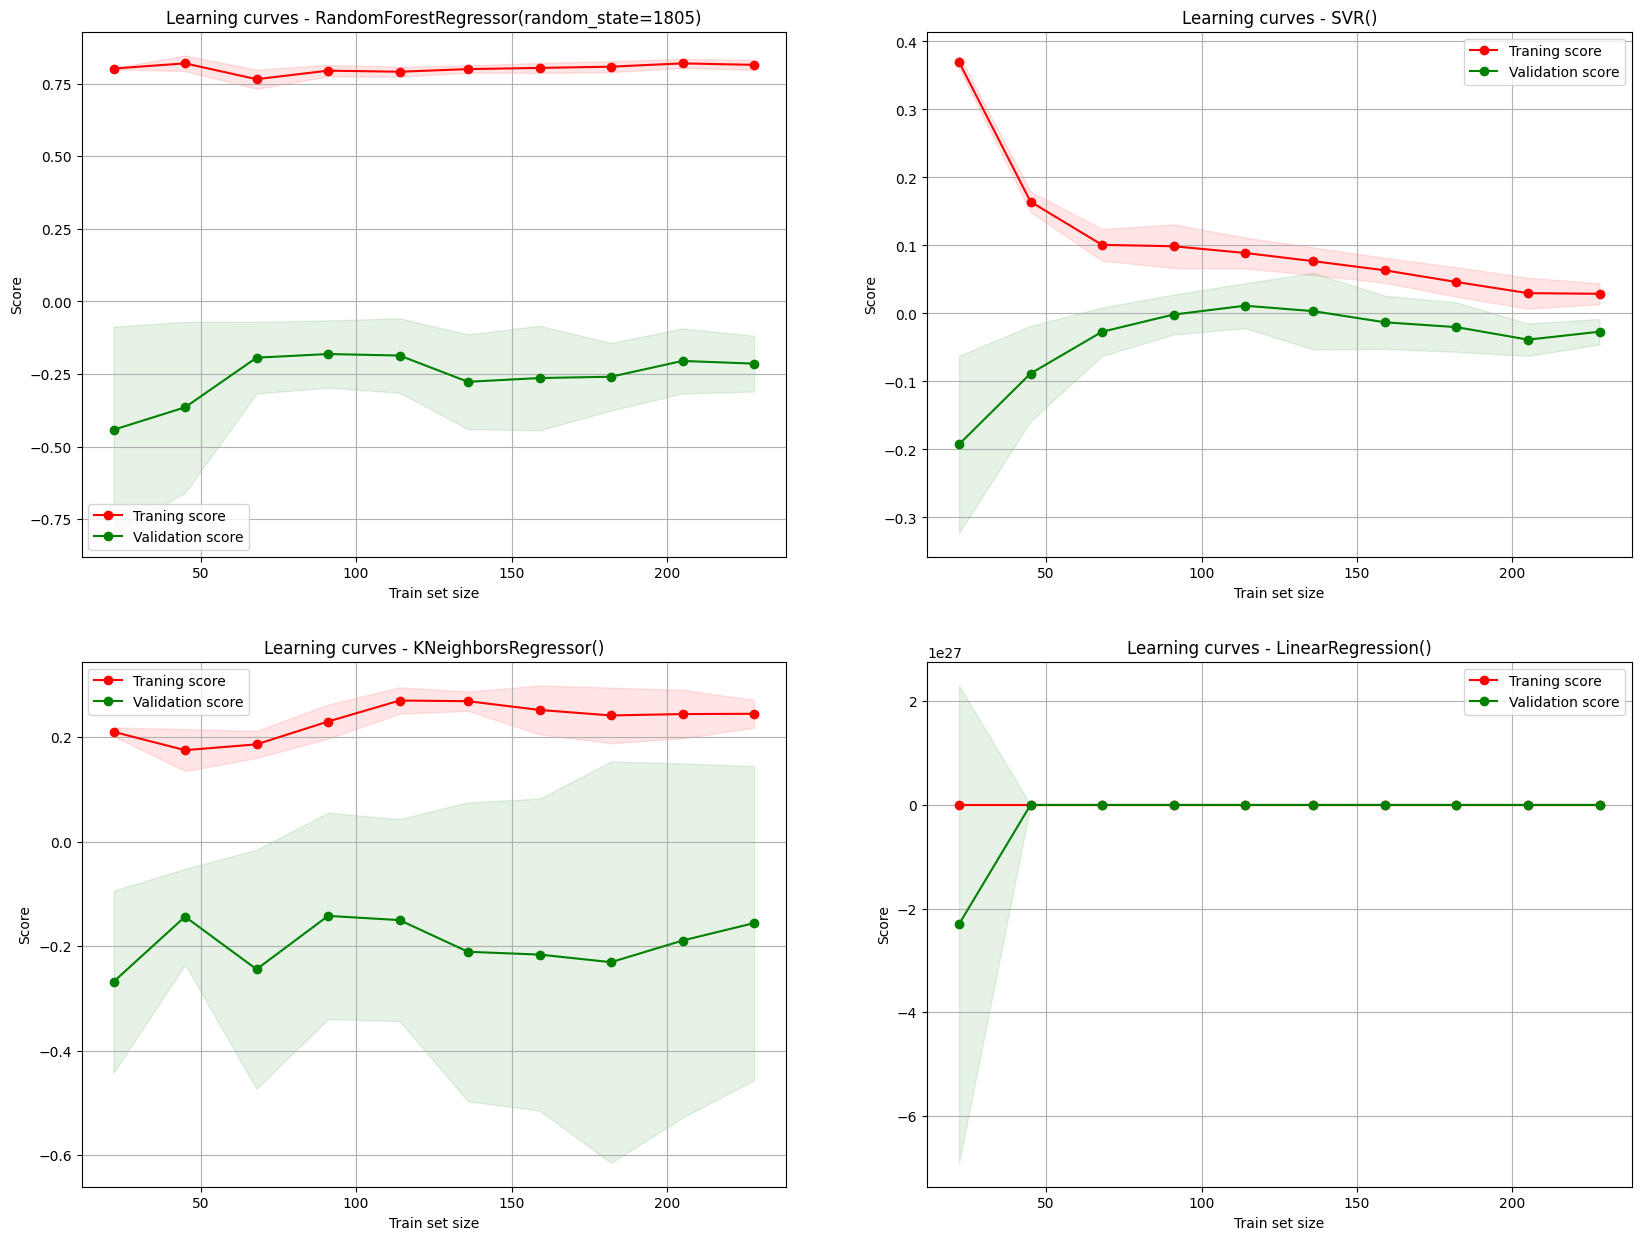

,target,model,hyperparameters,grid_score_train,grid_score_test,mse,mae,rmse,mean_error (s),fitting,complexity
0,TOT (s),Random Forest,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.27,-0.14,0.066,0.157,0.256,0.157,Overfitting :1.52,too much complex
1,TOT (s),SVR,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}",0.06,-0.12,0.065,0.149,0.255,0.149,Overfitting :3.0,too much complex
2,TOT (s),KNN Regressor,"{'n_neighbors': 20, 'p': 4, 'weights': 'uniform'}",0.08,-0.15,0.067,0.168,0.258,0.168,Overfitting :2.87,too much complex
3,TOT (s),Linear Regression,{},0.06,-0.13,0.066,0.163,0.256,0.163,Overfitting :3.17,too much complex


In [34]:
predict(X_TOT_encoded,y_TOT, method = 'regression')